# Face detection

### Face detection use cases
* filters
* auto focus
* recommendations
* blur for privacy protection
* to recognize emotions

### Detecting faces with scikit-image

In [1]:
# import the classifier class
from skimage.feature import Cascade

# import the data module
from skimage import data

# Load the trained file from the module  root
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

In [3]:
# Import numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

# Import image from data folder
image = plt.imread('../../data/photos/lady.jpg')

In [6]:
image.shape

(685, 637, 3)

In [7]:
 # Apply detector on the image
detected = detector.detect_multi_scale(img=image,
                                        scale_factor=1.2,
                                        step_ratio=1,
                                        min_size=(100, 100),
                                        max_size=(600, 600))


In [8]:
print(detected)

[{'r': 139, 'c': 178, 'width': 263, 'height': 263}]


* r - row position of the top left
* c - column position 
* width - width of the bounding box
* height - height of the bounding box

In [14]:
from matplotlib import patches


def show_detected_face(result, detected, title="Face image"):
    # Show the original image
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    # Show the detected faces
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'], fill=False,
                color='r', linewidth=2)
        )
    plt.show()

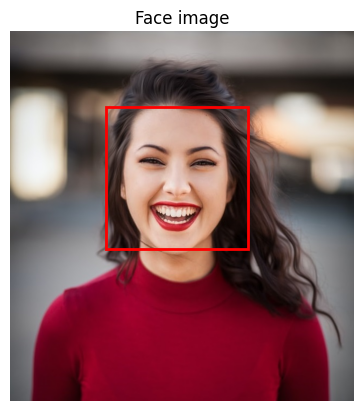

In [15]:
# Show detected image with bounding box
show_detected_face(image, detected)

In [ ]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

In [ ]:
# Obtain the segmentation with default 100 regions
segments = slic(profile_image, n_segments=100)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)